In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
from preprocess import Preprocess
from training import Server

In [3]:

p = Preprocess()
p.main_run()

# we tried the training process on 4 Tesla V100 cards.
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2,3' 

t = Server(pred_only=True, h5_path='data/pt_simple_1gd/real.h5')
# t.train()
props,y_truth = t.predict()

data/tordata300.h5 exists already!
data/crossval_indices.pkl exists already.
We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 0.581, accuracy = 0.755


[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0.]


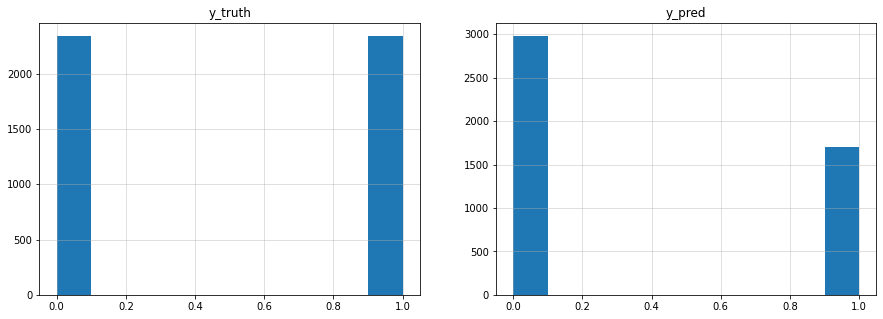

In [12]:
import tensorflow as tf
print((tf.sigmoid(props) >= 0.5).numpy().astype(float)[30:60])
print(y_truth[30:60])
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(y_truth)
axs[1].hist((tf.sigmoid(props) >= 0.5).numpy().astype(float))
axs[0].set_title('y_truth')
axs[1].set_title('y_pred')
axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)

We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 1.645, accuracy = 0.521
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0.]


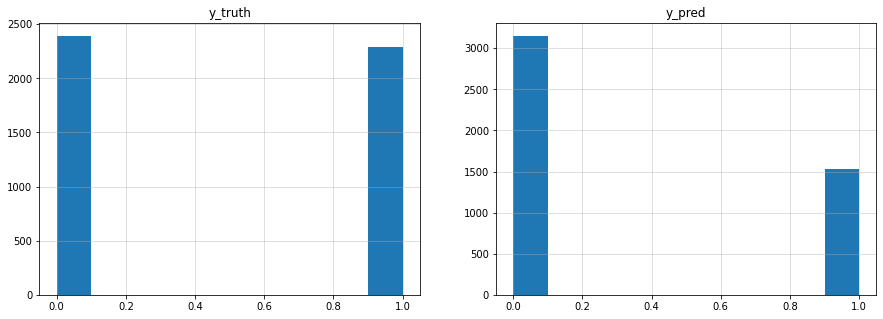

In [13]:
t = Server(pred_only=True, h5_path='data/pt_simple_1gd/fake.h5')
props,y_truth = t.predict()
print((tf.sigmoid(props) >= 0.5).numpy().astype(float)[30:60])
print(y_truth[30:60])
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(y_truth)
axs[1].hist((tf.sigmoid(props) >= 0.5).numpy().astype(float))
axs[0].set_title('y_truth')
axs[1].set_title('y_pred')
axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)

We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 1.817, accuracy = 0.547
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0.]


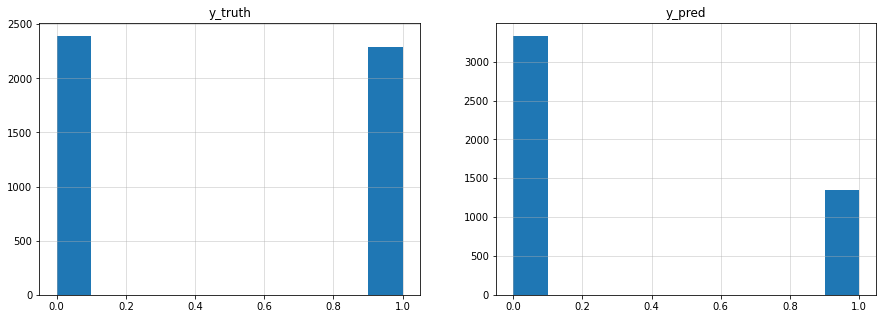

In [14]:
t = Server(pred_only=True, h5_path='data/pt_simple_5gd/fake.h5')
props,y_truth = t.predict()
print((tf.sigmoid(props) >= 0.5).numpy().astype(float)[30:60])
print(y_truth[30:60])
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(y_truth)
axs[1].hist((tf.sigmoid(props) >= 0.5).numpy().astype(float))
axs[0].set_title('y_truth')
axs[1].set_title('y_pred')
axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)

We are running on CPU!
Param size = 1337.826 MB



Testing result: loss = 3.923, accuracy = 0.543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0.]


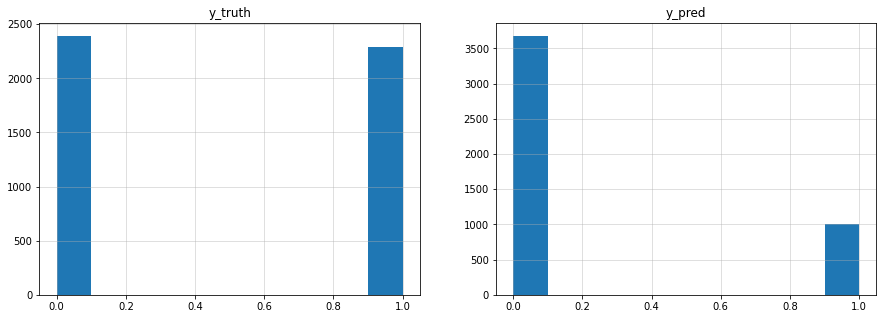

In [15]:
t = Server(pred_only=True, h5_path='data/pt_complex_1gd/fake.h5')
props,y_truth = t.predict()
print((tf.sigmoid(props) >= 0.5).numpy().astype(float)[30:60])
print(y_truth[30:60])
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(y_truth)
axs[1].hist((tf.sigmoid(props) >= 0.5).numpy().astype(float))
axs[0].set_title('y_truth')
axs[1].set_title('y_pred')
axs[0].grid(alpha=0.5)
axs[1].grid(alpha=0.5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

with open('log/train/replica_on_226/train_last_aux.pkl','rb') as f:
    sd = pickle.load(f)
his = sd['history']
    
fig, ax = plt.subplots()
loss_train = his['loss']
loss_val = his['val_loss']
n = range(len(loss_train))
plt.plot(n, loss_train, label='Training Loss',linewidth=3)
plt.plot(n, loss_val, label='Val Loss', linewidth=3)
plt.xlabel('Epochs', size=15,labelpad=0)
plt.ylabel('Sparse Cross Entropy', size=15, labelpad=0)
plt.tick_params(labelsize=14,direction='in',pad=2.5)
ax.legend(fontsize=14, framealpha=1)
plt.grid(alpha=0.5)

fig, ax = plt.subplots()
acc_train = his['acc']
acc_val = his['val_acc']
plt.plot(n, acc_train, label='Training Acc',linewidth=3)
plt.plot(n, acc_val, label='Val Acc', linewidth=3)
plt.xlabel('Epochs', size=15,labelpad=0)
plt.ylabel('Accuracy', size=15, labelpad=0)
plt.tick_params(labelsize=14,direction='in',pad=2.5)
ax.legend(fontsize=14, framealpha=1)
plt.grid(alpha=0.5)

In [ ]:
import numpy as np
logits = np.load('log/props.npy')
y_truth = np.load('log/y_truth.npy').astype(int)
y_pred = (logits>=0.5).astype(int)

In [ ]:
not False